# Pands Project: An Analysis of The Iris-Fisher Data Set
# Author: Chris Foley    

# Introduction

This document runs through and explains my programmatic analysis of the Iris-Fisher data-set. The Iris data-set is comprised of 150 observations of 5 variables: sepal length, sepal width, petal length, petal width and species. There are three species included, Iris Setosa, Iris Versicolor and Iris Virginica, with 50 measurements of sepal and petal length and width for each. The Iris set is widely used for training aspiring data scientists and machines alike. For data scientists it's a small and manageable data set to try out the tricks and tools of the trade. For those working in the field of machine learning, it provides a useful test case for algorithims designed to pick types from data sets without prior knowledge of what or how many types exist in the set, for example in Kmeans or Kmediod clustering. This analysis shows a little bit of what python can do with a data set.    

Our first line below changes the current directory to the one our data-set is stored in, allowing Jupyter to access it. 

In [1]:
cd C:\Users\chris\Desktop\programming\my-programming-mistakes 

C:\Users\chris\Desktop\programming\my-programming-mistakes


In [2]:
#PANDS Project: An Analysis of the Iris-Fisher data set
#Author: Chris Foley
#We start by importing modules used in the analysis
import pandas as pd #Used for manipulating the data-set
import matplotlib.pyplot as plt #Used for graphing data
import seaborn as sns #Addition to matplot.lib for more aesthetic graphing of data
sns.set_style('dark') #sets background style of seaborn graphs
from sklearn.cluster import KMeans
from sklearn import preprocessing
import sklearn.cluster as cluster
import sklearn.metrics as metrics
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv('IRIS.csv') #reading in our data set from the selected directory

# Basic Information & Descriptive Statistics

With the data set in hand we're ready to analyse. I start by using two useful Pandas methods "df.info()" and "df.describe()" 

In [3]:
df.info() #Is a pandas method which outputs the number of columns, empty variables and type of object in the data-set.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


df.info tells us we have four floats, one categorical object and no null values.

In [4]:
print(df.describe(include='all')) 
#A pandas method which outputs some descriptive statistics, e.g. means, standard deviations, min and max values and some
#percentiles. By adding "(include='all') it includes information on any categorical data. 

        sepal_length  sepal_width  petal_length  petal_width      species
count     150.000000   150.000000    150.000000   150.000000          150
unique           NaN          NaN           NaN          NaN            3
top              NaN          NaN           NaN          NaN  Iris-setosa
freq             NaN          NaN           NaN          NaN           50
mean        5.843333     3.054000      3.758667     1.198667          NaN
std         0.828066     0.433594      1.764420     0.763161          NaN
min         4.300000     2.000000      1.000000     0.100000          NaN
25%         5.100000     2.800000      1.600000     0.300000          NaN
50%         5.800000     3.000000      4.350000     1.300000          NaN
75%         6.400000     3.300000      5.100000     1.800000          NaN
max         7.900000     4.400000      6.900000     2.500000          NaN


df.describe tells us there are three distinct species types with a frequency of 50 scores each totalling 150. 
Our numerical data shows the highest value is for sepal length at 7.9cm. The next closest is petal length at 
6.9cm. Sepal length is also the highest minimum value at 4.3cm. Petal width is the smallest value as measured by mean, 
min and max and has a similar standard deviation to sepal length (.82 and .76). Sepal width and petal length thus 
represent the middle range of our data-set at 3 and 3.7 respectively. However, in spite of the closeness of their means, 
we can't necessarily expect these scores to be clustered close together, as between them they have the smallest and 
largest standard deviations, at 0.4 for sepal width and 1.7 for petal length.

# Histograms

[Text(0.5, 1.0, 'Histogram of Iris Sepal Length')]

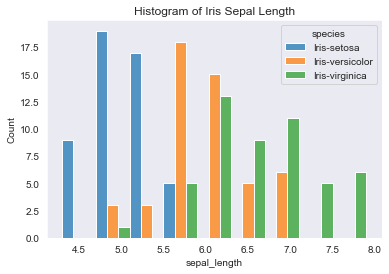

In [5]:
#Next we plot Histograms of the three plants for each variable, starting with Sepal Length.
sns.histplot(data = df, x = 'sepal_length', hue = "species", multiple="dodge").set(title='Histogram of Iris Sepal Length')
#"x" provides the variable we're looking at the frequency of, while "Hue" tells Seaborn to divide the scores 
#according to out categorical variable column "species". "dodge" tells Seaborn to present the graphs side by side
#and not overlapping or on top of one another. Finally we use ".set(title" to title our Histograms. The legend is 
#automatically input by Seaborn's "hue" function.

The resulting histogram shows that the Setosa plant has the shortest sepal length, with most of it's scores clustered 
between 4.5 and 5.5cm. Iris-Virginica has the largest sepal length with most of it's scores clustered between 6 and 8cm. 
Iris-Versicolor occupies the middle range between the two. This implies if we're looking at sepal length alone, an Iris 
plant with a very long sepal is likely a Virginica. Conversely, a very short sepal indicates a Setosa. 

[Text(0.5, 1.0, 'Histogram of Iris Petal Length')]

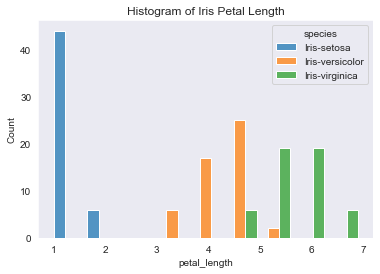

In [6]:
#Plots Histogram for Petal length.
sns.histplot(data = df, x = 'petal_length', hue = "species", multiple="dodge").set(title='Histogram of Iris Petal Length')

Note Iris-Setosa is distinctly shorter than it's peers, with all of it's scores in a range of 1-2cm. Meanwhile Iris-Virginica 
is again the longest with most of it's scores between 5.5 and 6 and it's highest coming in at 7. Iris-Versicolor is again in 
the middle but this time with less overlap than in sepal length. Meaning when it comes to petal petal length we can be 
reasonably assured a length of 1-2cm indicates a Setosa, a length of 3-5cm a Versicolor and a length of 5-7 a Virginica. 
Briefly summarised, our findings on length are that Iris-Setosa is the shortest, Virginica is the longest. 

[Text(0.5, 1.0, 'Histogram of Iris Sepal Width')]

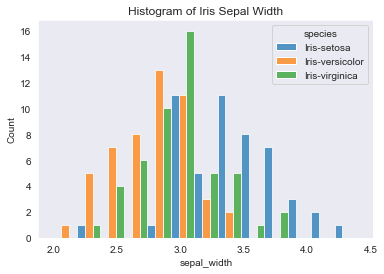

In [7]:
#Plots Histogram for Sepal Width
sns.histplot(data = df, x = 'sepal_width', hue = "species", multiple="dodge").set(title='Histogram of Iris Sepal Width')

Now we move on to Sepal width where we can see a much denser distribution around 2.5 and 3.5cm for each species. On the wider 
end of the spectrum sit's the Setosa while the narrowest plant is the Versicolor. Iris-Virginica occupies the middle when it 
comes to width. Overall though these scores are much closer together and therefore less likely to be reliable predictors of 
species type by themselves. Though taken with our previous insights, if an Iris is very short and very wide it's probably a 
Setosa.

[Text(0.5, 1.0, 'Histogram of Iris Petal Width')]

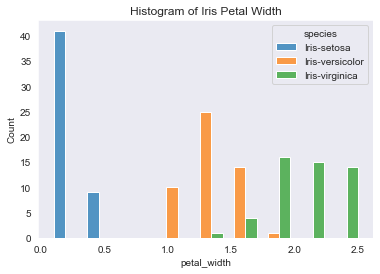

In [8]:
#Plots Histogram for Petal Width
sns.histplot(data = df, x = 'petal_width', hue = "species", multiple="dodge").set(title='Histogram of Iris Petal Width')

This graph looks a lot like the graph of petal length, which may lead us to suppose there will be a strong positive correlation between petal length and width, a supposition we will test shortly. Unlike its sepal, the Setosa's petal is quite small, with all of its scores coming between 0.1 and 0.5cm. Iris-Versicolor comprises the middle range from 1-1.6cm with an outlier nearing 2cm. The widest petal belongs to Iris-Virginica at 2.5 and indeed, the majority of its scores are in the range 2 2.5cm. There is a Virginica outlier too around 1.4cm. 

From these histograms we've learned to distinguish Iris-Setosa from its fellows by its short length, narrow petal and wide sepal. Iris-Virginica too can be distinguished by its long petal and sepal and wide petal. Iris-Versicolor is most often the middle between the Setosa and Virginica's extremes, except in Sepal width, where it's most likely the narrowest. Though with Versicolor's tendency towards the middle the probability of correctly guessing its species based on this data alone should be lower than for Virginica and less again than for Setosa. 

# Line Plots 

Below are a series of line plots showing each plants' scores in petal and sepal width and length, showing very similar results to the histograms discussed above. Because of this similarity I do not comment on the line plots, as doing so would be highly repetitive.  

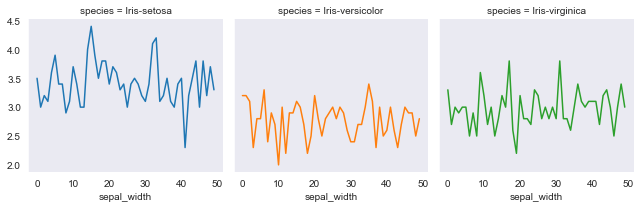

In [9]:
# Plots line map of 3 species in line
plot = sns.FacetGrid(df, col="species", hue="species")#Takes data and column as input. "Hue" provides color for each variable of
#type species
plot.map(plt.plot, "sepal_width")#This line tells Seaborn what variable to plot.  

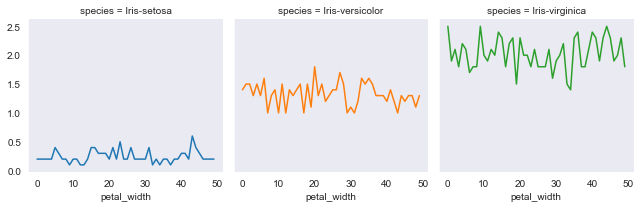

In [10]:
plot = sns.FacetGrid(df, col="species", hue="species") 
plot.map(plt.plot, "petal_width")

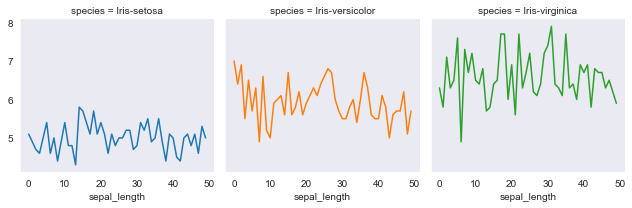

In [11]:
plot = sns.FacetGrid(df, col="species", hue="species") 
plot.map(plt.plot, "sepal_length")

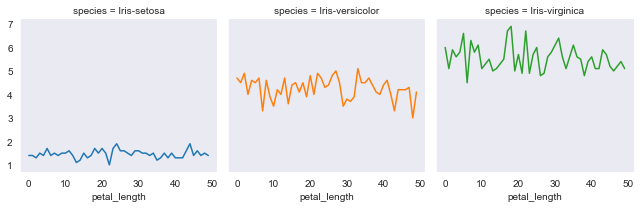

In [12]:
plot = sns.FacetGrid(df, col="species", hue="species") 
plot.map(plt.plot, "petal_length")

# Correlational Analysis

Next we use some useful tools from both Pandas and Seaborn to assess the strength and direction of correlations between our four variables. 

In [13]:
#Prints correlation table for data
print(df.corr()) 

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


The Pandas method used above tells us all we need to know, but using Seaborn we can make this information more visually appealing. This is done with Seaborn's heatmap function below. 

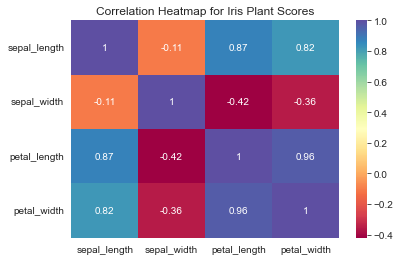

In [14]:
dataplot = sns.heatmap(df.corr(), cmap="Spectral", annot=True).set(title='Correlation Heatmap for Iris Plant Scores')#prints 
#heatmap of correlations, "cmap" chooses color scheme. Setting "annot" to "True" tells Seaborn to display the numerical values 
#of each relation in each cell making for better readability. ".set(title)" set's title.  

Earlier we noted a striking similarity in the histograms for petal length and petal width and now we can confirm this, and also tell if there are any other interesting correlations we may have missed. We see a very strong positive correlation (0.96) for petal length and petal width, as suspected. Petal length and sepal length also share a strong positive correlation (0.87), as do sepal length and petal width (0.82). In addition, there are weak negative correlations for sepal width and petal length (-0.42), and for sepal width and petal width (-0.36). Finally, there is an almost no relation whatsoever between sepal length and sepal width (-0.11). Finally we can use another Seaborn function to get an even more fine grained look at our variables relations to each other using the pairplot function. 

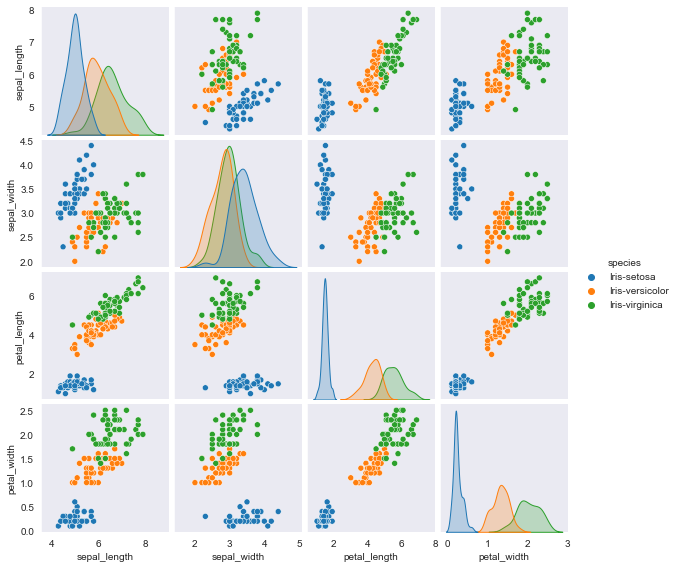

In [15]:
# compares each pair of variables by species
sns.pairplot(df, hue='species', height=2)

This pairplot function creates a scatterplots for each pair of variables, shows us the same correlations as the heatmap and correlation table but with the added benefit of being able to see each data point. Looking at the data in this way we can see Iris-Setosa can be easily distinguished by being typically smaller than its compatriots in all areas but Sepal width. While Iris-Virginica and Versicolor are closer together in most areas, Virginica’s slight size edge over versicolor in all but sepal width mean it is also fairly reliably distinguishable from it’s cohorts on these grounds. Though the distinction is not as great as between Setosa and the others. We can graph this fact by using some tools employed in Kmeans testing. In Kmeans testing we assign cluster centres to data sets and then determines which each data point belongs to based on it's proximity to each centre. This is handy for classifying data we don't know the type of, or in this case, where we want to see if we were to slice the data into two clusters, would setosa be isolated and versicolor and virginica lumped together.

This is shown in the pairplots below, where we have specified there should only be two clusters.  

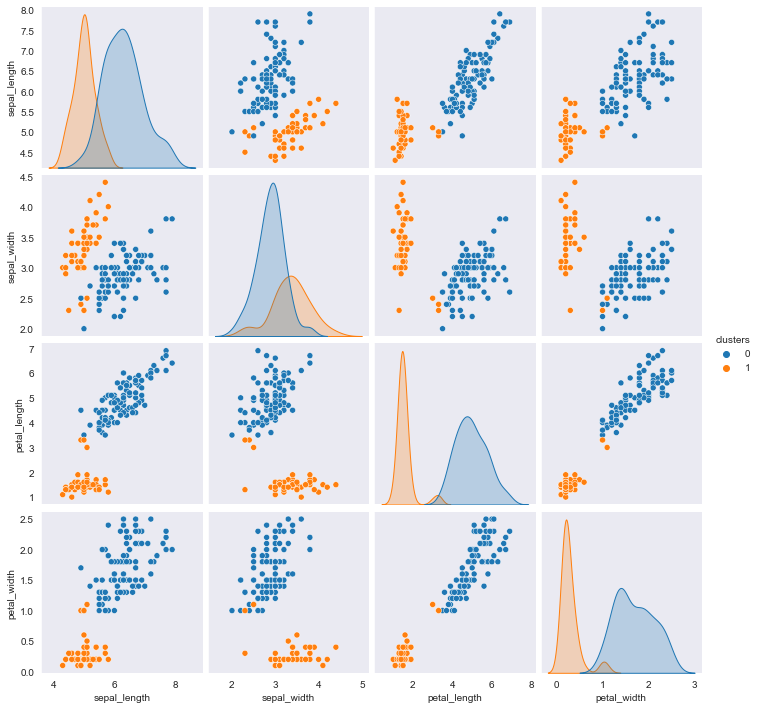

In [16]:
#Sets number of clusters and number of times algorithm  will run with different centroid seeds.
km=KMeans(n_clusters=2, n_init=10)
#fit_predict calculates cluster centres and predicts cluster index for each sample.
y_predicted =km.fit_predict(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
#Finds the centroid of the clusters. This will be consistent with labels unless the algorithim  stops before fully converging 
km.cluster_centers_
#assigns samples in data to indexes in cluster
df['clusters'] = km.labels_
#plots pairplot
sns.pairplot(df, hue = 'clusters')

The result leave Iris Setosa as is while lumping Virginica and Versicolor together, thus affirming the difference noted previously and also the potential difficulty in differentiating Versicolor and Virginica.

# References

1. Reading data-set with Pandas: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
2. Loading data-sets in Seaborn: https://seaborn.pydata.org/generated/seaborn.load_dataset.html
3. Pandas Info method: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html
4. Pandas Describe method: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html
5. Ploting Histplots in Seaborn: https://seaborn.pydata.org/generated/seaborn.histplot.html
6. Plotting FacetGrid in Seaborn: https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
7. Pandas correlation method: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
8. Heatmaping correlations in Seaborn: https://seaborn.pydata.org/generated/seaborn.heatmap.html
9. Pairplotting in Seaborn: https://seaborn.pydata.org/generated/seaborn.pairplot.html
10. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
11. https://machinelearningknowledge.ai/tutorial-for-k-means-clustering-in-python-sklearn/